Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [1]:
airbnb<-read.csv('airbnb-listings.csv',sep = ';')
#options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

In [2]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [3]:
airbnb<-airbnb[,c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')]
airbnb

City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
Frederiksberg,Private room,Frederiksberg,1,1.0,1,1,298,NA,1,0,90,55.67598,12.53296
Frederiksberg,Entire home/apt,Frederiksberg,3,1.0,2,3,NA,NA,2,132,96,55.67591,12.53433
Frederiksberg,Entire home/apt,,2,1.0,1,1,649,NA,1,0,NA,55.69145,12.53283
Frederiksberg,Entire home/apt,Frederiksberg,4,1.0,2,3,656,NA,1,0,NA,55.68292,12.53656
Frederiksberg,Private room,Frederiksberg,2,1.0,1,1,232,NA,1,0,87,55.68397,12.55303
Frederiksberg,Entire home/apt,Frederiksberg,4,1.0,2,2,603,NA,1,0,100,55.67540,12.54698
Frederiksberg,Entire home/apt,,2,1.0,1,1,715,NA,1,0,97,55.68036,12.54734
Frederiksberg,Entire home/apt,Frederiksberg,6,1.0,2,6,649,NA,2,100,98,55.68497,12.54787
Frederiksberg,Entire home/apt,Frederiksberg,2,1.0,1,1,298,NA,1,0,NA,55.69702,12.53463


Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [4]:
df_madrid<-airbnb[airbnb$Room.Type == 'Entire home/apt' & airbnb$City ==  'Madrid',]
df_madrid<-df_madrid[df_madrid$Neighbourhood != '',]
df_madrid

,City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1709,Madrid,Entire home/apt,Palacio,2,1.0,1,1,85,NA,1,0,95,40.41697,-3.709439
1711,Madrid,Entire home/apt,Malasaña,4,1.0,1,2,112,NA,2,5,99,40.42319,-3.711249
1712,Madrid,Entire home/apt,Palacio,8,3.0,3,4,190,NA,6,40,96,40.41651,-3.717843
1716,Madrid,Entire home/apt,La Latina,2,1.0,1,1,71,NA,1,0,90,40.41200,-3.706691
1718,Madrid,Entire home/apt,Embajadores,2,NA,1,NA,34,NA,1,6,88,40.40809,-3.700322
1719,Madrid,Entire home/apt,Embajadores,3,1.0,0,2,60,NA,1,0,100,40.41085,-3.701099
1720,Madrid,Entire home/apt,La Latina,2,1.0,0,1,45,NA,1,0,87,40.40812,-3.710367
1724,Madrid,Entire home/apt,Embajadores,6,1.0,2,3,120,NA,6,30,100,40.41314,-3.705092
1725,Madrid,Entire home/apt,Embajadores,4,1.0,0,2,50,NA,2,8,86,40.40988,-3.702840


In [5]:
df_madrid$Room.Type <- NULL
df_madrid$City <- NULL
head(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1709,Palacio,2,1,1,1,85,NA,1,0,95,40.41697,-3.709439
1711,Malasaña,4,1,1,2,112,NA,2,5,99,40.42319,-3.711249
1712,Palacio,8,3,3,4,190,NA,6,40,96,40.41651,-3.717843
1716,La Latina,2,1,1,1,71,NA,1,0,90,40.41200,-3.706691
1718,Embajadores,2,NA,1,NA,34,NA,1,6,88,40.40809,-3.700322
1719,Embajadores,3,1,0,2,60,NA,1,0,100,40.41085,-3.701099


Crea una nueva columna llamada Square.Meters a partir de Square.Feet. Recuerda que un pie cuadrado son 0.092903 metros cuadrados.

In [6]:
df_madrid$Square.Meters <- df_madrid$Square.Feet*0.092903

In [7]:
head(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1709,Palacio,2,1,1,1,85,NA,1,0,95,40.41697,-3.709439,NA
1711,Malasaña,4,1,1,2,112,NA,2,5,99,40.42319,-3.711249,NA
1712,Palacio,8,3,3,4,190,NA,6,40,96,40.41651,-3.717843,NA
1716,La Latina,2,1,1,1,71,NA,1,0,90,40.41200,-3.706691,NA
1718,Embajadores,2,NA,1,NA,34,NA,1,6,88,40.40809,-3.700322,NA
1719,Embajadores,3,1,0,2,60,NA,1,0,100,40.41085,-3.701099,NA


¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [8]:
table(is.na(df_madrid[df_madrid$Square.Meters,]))
#tienen NA en Square.Meters 68773 apartamentos
porcentaje<-(68773/sum(table(is.na(df_madrid[df_madrid$Square.Meters,]))))*100
porcentaje


FALSE  TRUE 
 2376 68773 

[1] 96.66053

De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [9]:
total<-sum(table(na.omit(df_madrid[df_madrid$Square.Meters,1])))
total0<-sum(table(na.omit(df_madrid[df_madrid$Square.Meters == 0,1])))
porc0<-(total0/total)*100
porc0

[1] 58.44749

Reemplazar todos los 0m^2 por NA 

In [10]:
df_madrid$Square.Meters<-replace(df_madrid$Square.Meters,df_madrid$Square.Meters == 0, NA)

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA. Pero **antes de crear el modelo** vamos a hacer:
* pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.
* crearemos una variable sintética nueva basada en la similitud entre barrios que usaremos en nuestro modelo.

Pinta el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [11]:
df_madrid$Square.Meters<-replace(df_madrid$Square.Meters,df_madrid$Square.Meters < 20, NA)

Existen varios Barrios que todas sus entradas de Square.Meters son NA, vamos a eliminar del dataset todos los pisos que pertenecen a estos barrios.

In [12]:
df_madrid %>% group_by(Neighbourhood) %>%  summarize(sum(is.na(Square.Meters)), num=n())  -> barrios

In [13]:
names(barrios)<-c('Neighbourhood','TOTAL_n_a','NUM_pisos')

In [14]:
barriosEliminar <- barrios[barrios$TOTAL_n_a == barrios$NUM_pisos, 1]

In [15]:
#quitar barrios que todos sus Square.Meters son NA
df_madrid<-df_madrid %>% filter(!df_madrid$Neighbourhood  %in%  unlist(unique(barriosEliminar),use.names = FALSE))


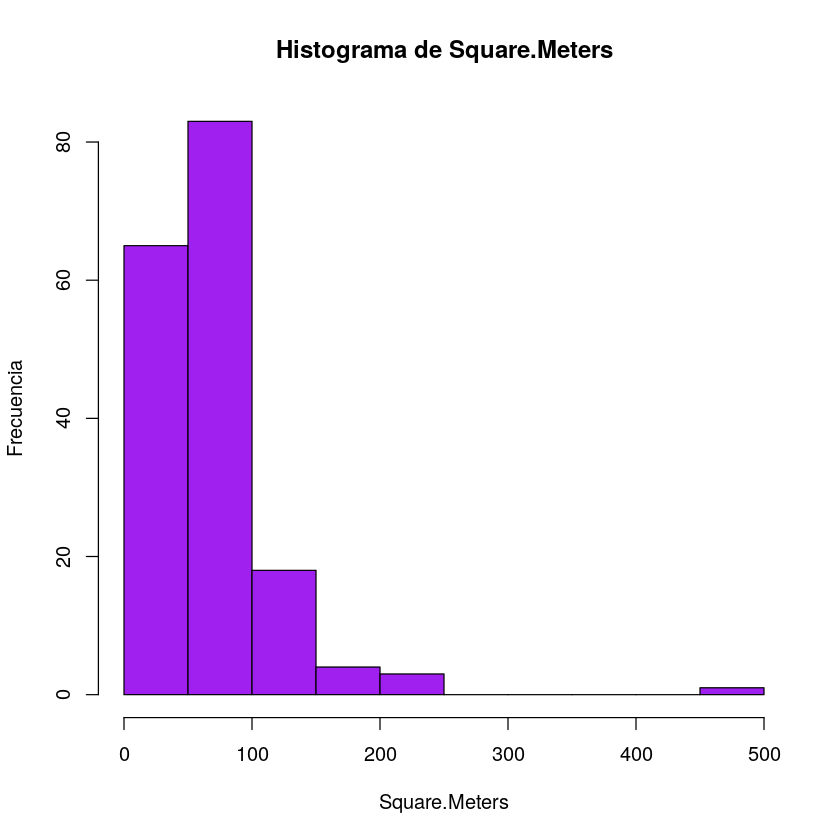

In [16]:
hist(df_madrid$Square.Meters, main = "Histograma de Square.Meters", 
     xlab = "Square.Meters", ylab = "Frecuencia",col = "purple")

#segun el resultado del histograma podemos determinar que los pisos mayores de 300m2 no son relevantes y los podemos eliminar
df_madrid$Square.Meters<-replace(df_madrid$Square.Meters,df_madrid$Square.Meters > 300, NA)

El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

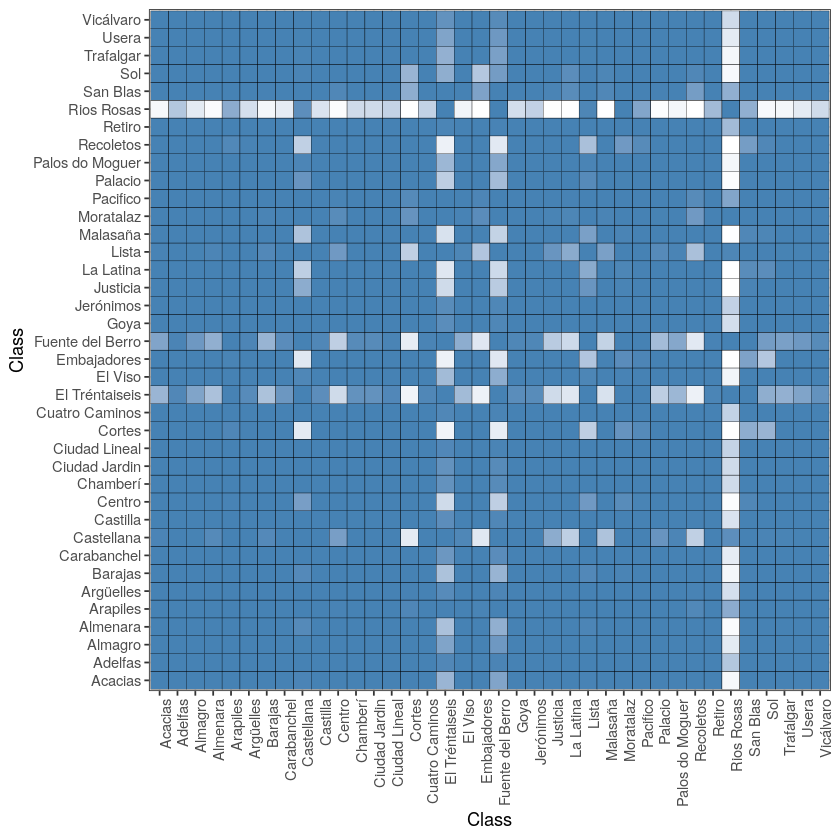

In [18]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust =1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


In [19]:
spellman.tree <- hclust(as.dist(1 - resm), method="complete")
spellman.dend <- as.dendrogram(spellman.tree) 

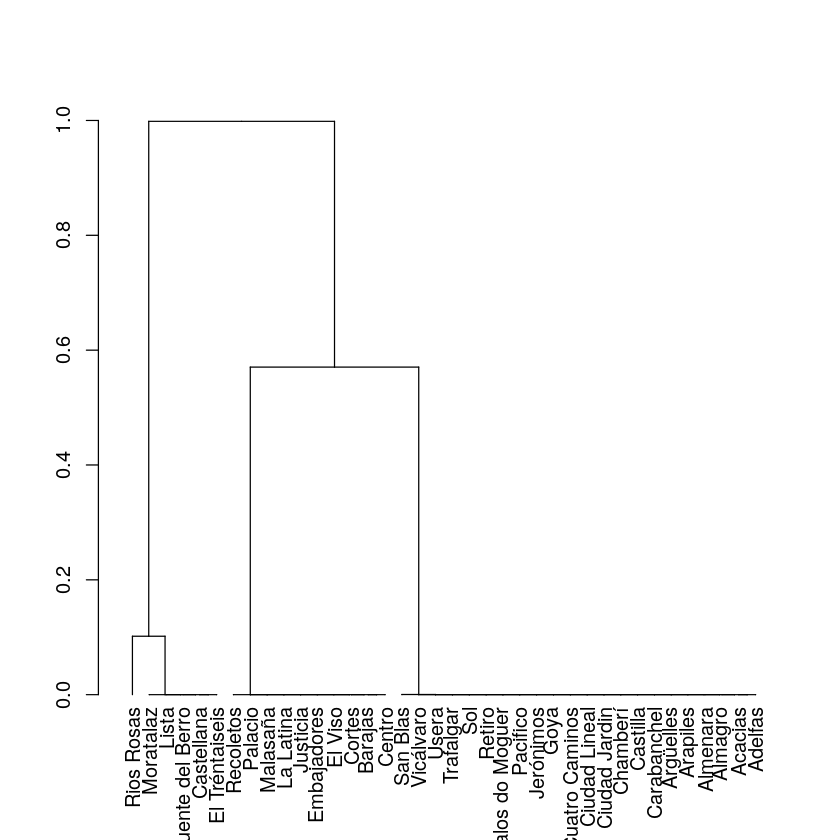

In [20]:
plot(spellman.dend )

¿Que punto de corte sería el aconsejable?, ¿cuantos clusters aparecen?

In [21]:
# En el dendograma aparecen 4 cluster.
#Se puede observar, en la siguiente gráfica, que la mejor opción es la de 3 cluster
#ya que coincide con el punto de inflexión de la gráfica.

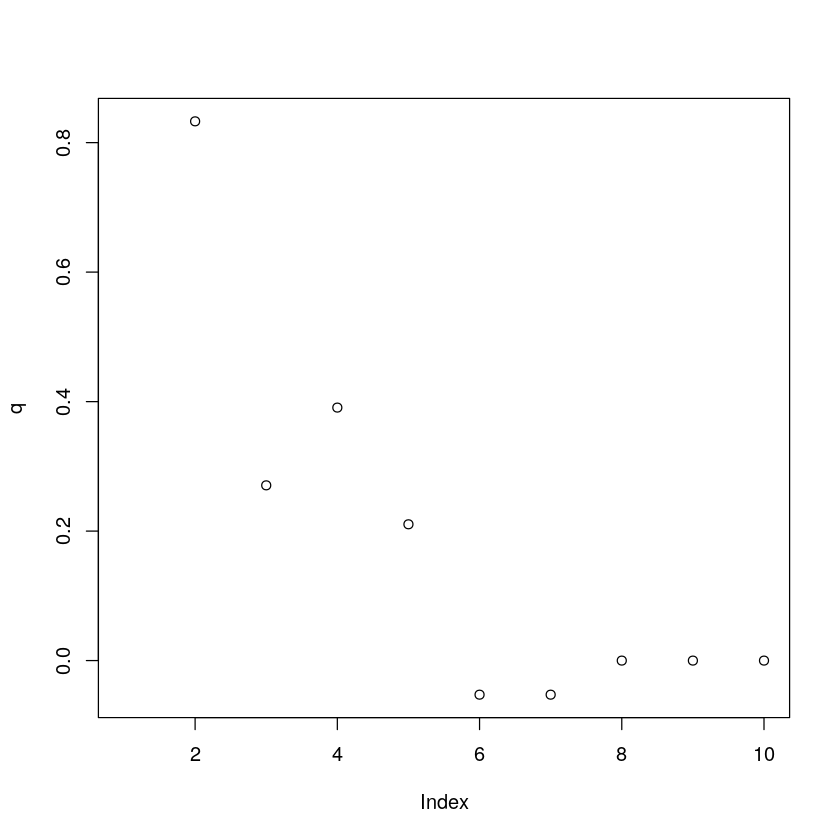

In [22]:
library(cluster)

q<-c()
for (k in 2:10){
    myclust<-kmeans(1 - resm,k)
    ss<-silhouette(myclust$cluster, as.dist(1 - resm))    
    q[k]<-mean(ss[, "sil_width"])
}
plot(q)


Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [23]:
neighb_id<-cutree(spellman.tree, k=3)
df_madrid <- df_madrid[with(df_madrid, order(df_madrid$Neighbourhood)),]
df2<-data.frame(unique(df_madrid$Neighbourhood),factor(neighb_id))
names(df2)<- c("Neighbourhood","neighb_id")
df2

,Neighbourhood,neighb_id
,<chr>,<fct>
Acacias,Acacias,1
Adelfas,Adelfas,1
Almagro,Almagro,1
Almenara,Almenara,1
Arapiles,Arapiles,1
Argüelles,Argüelles,1
Barajas,Barajas,2
Carabanchel,Carabanchel,1
Castellana,Castellana,3


In [24]:
df_madrid_cluster<-merge(df_madrid, df2, by = "Neighbourhood")

Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [25]:
df_madrid_cluster_2<- df_madrid_cluster
df_madrid_cluster<-filter(df_madrid_cluster,!is.na(df_madrid_cluster$Square.Meters),)

set.seed(1)
idx <- sample(1:nrow(df_madrid_cluster), nrow(df_madrid_cluster)*0.7)
df_train<-df_madrid_cluster[idx,]
df_test<-df_madrid_cluster[-idx,]
#table(df_train$Neighbourhood)
#table(df_test$Neighbourhood)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.5     ✔ purrr   0.3.4
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 2 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removing 1 row that contained a missing value”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removing 1 row that contained a missing value”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 6

Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 6 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 6 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 6 rows containing missing values (geom_point).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better 

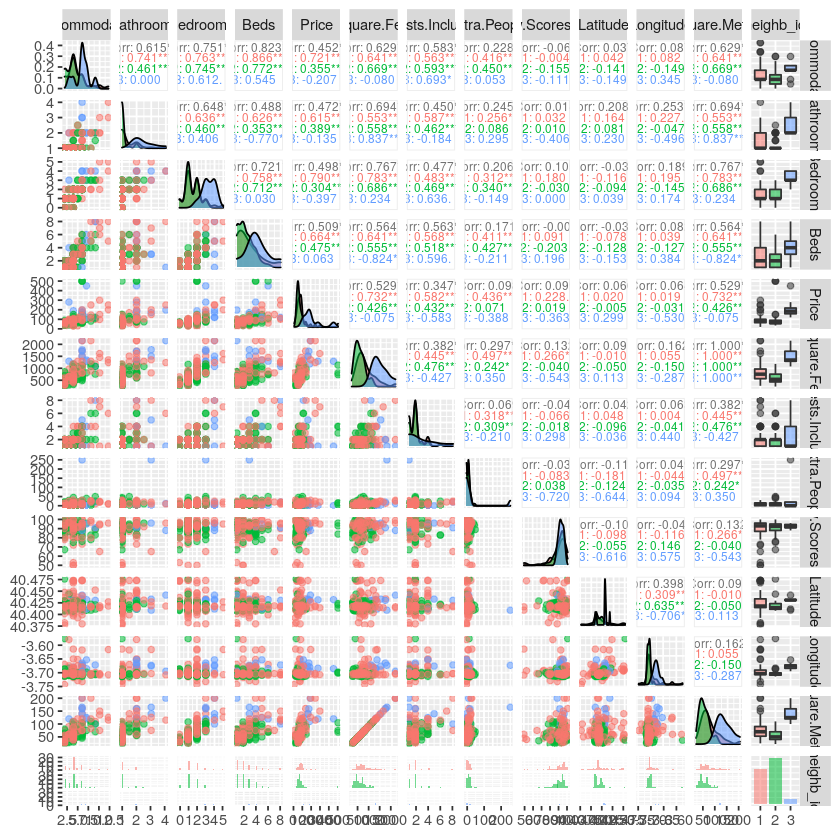

In [26]:
#grafico correlaciones
library(tidyverse)
library(ggplot2)
library(GGally)
ggpairs(df_madrid_cluster %>% select(-Neighbourhood), 
 aes(color = neighb_id,  alpha = 0.5),
        upper = list(continuous = wrap("cor", size = 2.5))
       )
       

In [27]:
#Seleccionamos las columnas con mas correlacion con Square.Meters
model <- lm(df_train, formula=Square.Meters ~Bathrooms+Bedrooms+Beds+Price:neighb_id)
summary(model)


Call:
lm(formula = Square.Meters ~ Bathrooms + Bedrooms + Beds + Price:neighb_id, 
    data = df_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-67.416  -9.747  -1.248   7.998  65.431 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      15.12049    4.79124   3.156  0.00206 ** 
Bathrooms        12.12934    4.14912   2.923  0.00420 ** 
Bedrooms         21.60356    3.08226   7.009 1.97e-10 ***
Beds             -1.95359    1.62619  -1.201  0.23218    
Price:neighb_id1  0.19203    0.04487   4.280 3.98e-05 ***
Price:neighb_id2  0.02096    0.03131   0.669  0.50461    
Price:neighb_id3  0.12162    0.03696   3.291  0.00134 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.54 on 111 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.7236,	Adjusted R-squared:  0.7087 
F-statistic: 48.43 on 6 and 111 DF,  p-value: < 2.2e-16


In [28]:
df_train$pred <- predict(model, df_train)
#comprobar modelo 
caret::postResample(pred=df_train$pred, obs= df_train$Square.Meters)

RMSE   Rsquared        MAE 
17.9797214  0.7235951 12.7035063

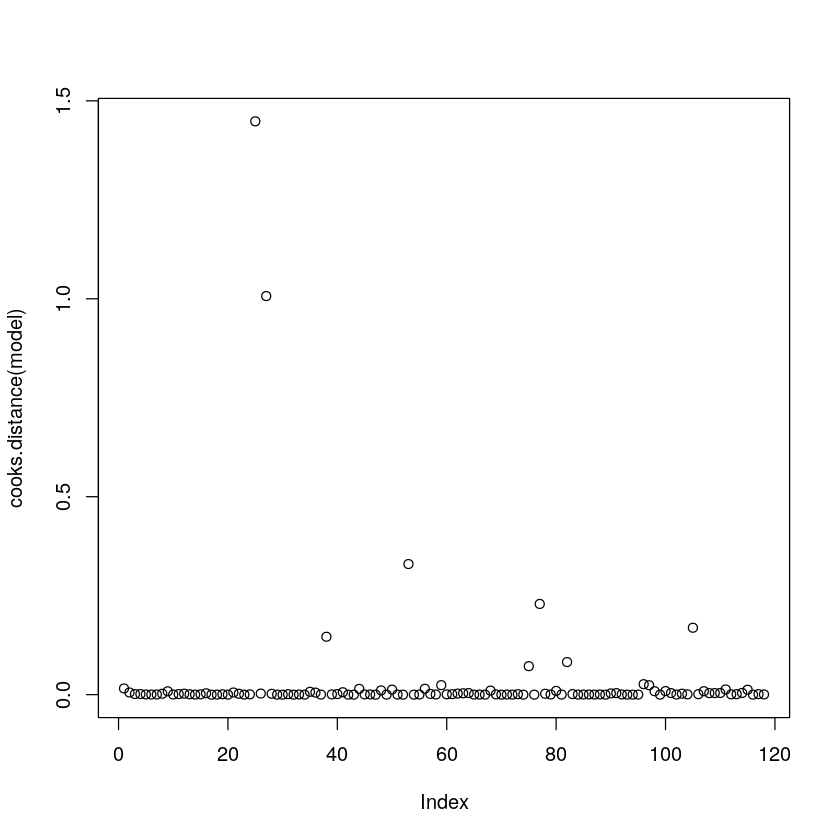

In [29]:
plot(cooks.distance(model))

In [30]:
#limpiar outliers
df_train_clean<-df_train[cooks.distance(model)<0.25,]

In [31]:
model_clean <- lm(df_train_clean, formula=Square.Meters ~Bathrooms+Bedrooms+I(Price^2):neighb_id)
summary(model_clean)


Call:
lm(formula = Square.Meters ~ Bathrooms + Bedrooms + I(Price^2):neighb_id, 
    data = df_train_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.741  -9.775   0.235   7.202  60.819 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            6.764e+00  4.369e+00   1.548   0.1245    
Bathrooms              2.307e+01  3.854e+00   5.986 2.79e-08 ***
Bedrooms               1.755e+01  2.196e+00   7.993 1.49e-12 ***
I(Price^2):neighb_id1  1.451e-03  2.118e-04   6.849 4.59e-10 ***
I(Price^2):neighb_id2 -1.733e-05  4.795e-05  -0.361   0.7185    
I(Price^2):neighb_id3  1.526e-04  7.974e-05   1.914   0.0583 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.37 on 109 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.7826,	Adjusted R-squared:  0.7726 
F-statistic: 78.46 on 5 and 109 DF,  p-value: < 2.2e-16


In [32]:
df_train_clean$pred <- predict(model_clean, df_train_clean)


In [33]:
#comprobar modelo
caret::postResample(pred=df_train_clean$pred, obs= df_train_clean$Square.Meters)

RMSE   Rsquared        MAE 
15.9388544  0.7825604 11.8808528

Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

In [34]:
df_train_clean$residuo <- df_train_clean$Square.Meters - df_train_clean$pred

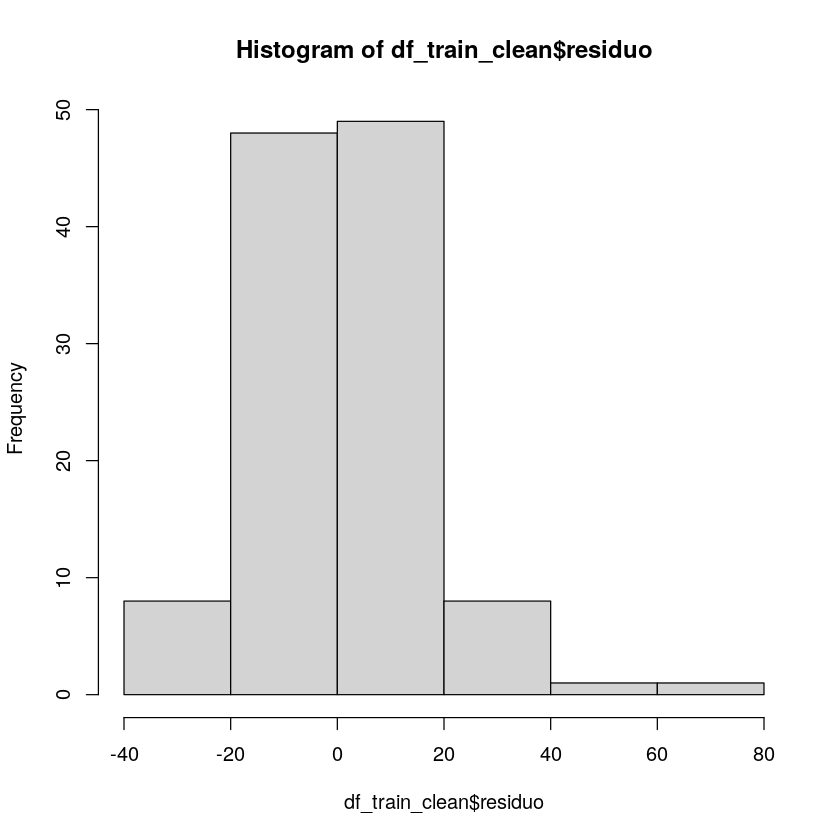

In [35]:
hist(df_train_clean$residuo,7)

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates), con 1 baño, con un precio de 80€/noche y 3 habitaciones en el barrio de Sol, con 3 camas y un review de 80.
¿Cuantos metros cuadrados tendría? Si tu modelo necesita algúna variable adicional puedes inventartela dentro del rango de valores del dataset.
¿Como varía sus metros cuadrados con cada habitación adicional?

In [36]:
data_test<-data.frame(Neighbourhood=c("Sol"),
                     Accommodates=c(6),
                     Bathrooms=c(1),
                     Beds=(3),
                     Price=c(80),
                     Bedrooms=c(3),
                     Review.Scores.Rating = c(80),
                     neighb_id=factor(c(1)))
data_test
predict(model_clean,data_test)


Neighbourhood,Accommodates,Bathrooms,Beds,Price,Bedrooms,Review.Scores.Rating,neighb_id
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Sol,6,1,3,80,3,80,1


1 
91.76709

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [51]:
#table(is.na(df_madrid_cluster_con_na$Square.Meters))
df_madrid_cluster_2$Predict<-predict(model_clean,df_madrid_cluster_2)

In [53]:
df_madrid_cluster_2$Square.Meters<-replace(df_madrid_cluster_2$Square.Meters,is.na(df_madrid_cluster_2$Square.Meters), df_madrid_cluster_2$Predict)

In [54]:
df_madrid_cluster_2[is.na(df_madrid_cluster_2$Square.Meters),]

Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id,Predict
<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>


In [62]:
df_madrid_cluster_2$Predict<-NULL

Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [63]:
datos<-df_madrid_cluster_2
datos$Neighbourhood<-NULL
datos$neighb_id<-NULL
datos$Square.Feet<-NULL
datos<-na.omit(datos)

In [64]:
new_apartament<-data.frame(Accommodates=c(5),
                     Bathrooms=c(2),
                     Beds=(3),
                     Price=c(100),
                     Guests.Included=c(2),
                     Extra.People=c(1),
                     Bedrooms=c(3),
                     Review.Scores.Rating = c(70),
                     Latitude= c(40.50519),
                     Longitude= c(-3.706720),
                     Square.Meters= c(95))

In [65]:
head(datos)

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,4,2,2,4,90,2,25,92,40.40435,-3.706820,99.75602
2,4,1,2,4,70,4,15,91,40.40226,-3.703189,72.04192
3,2,1,1,1,120,1,0,98,40.40376,-3.712270,68.27607
4,2,1,0,1,39,1,0,100,40.40094,-3.702806,32.04170
5,2,1,1,1,68,1,0,94,40.40452,-3.707737,54.09258
6,5,2,2,2,120,4,20,95,40.40519,-3.706163,108.89637


In [66]:
train_matrix<-rbind(new_apartament,datos)

In [67]:
row.names(train_matrix[train_matrix$Accommodates==5 
             & train_matrix$Bathrooms==2
             & train_matrix$Beds==3
             & train_matrix$Price==100
             & train_matrix$Guests.Included==2
             & train_matrix$Extra.People==1
             & train_matrix$Bedrooms==3
             & train_matrix$Review.Scores.Rating==70
             & train_matrix$Latitude==40.50519
             & train_matrix$Longitude==-3.706720
             & train_matrix$Square.Meters==95,])

[1] "1"

In [68]:
names(train_matrix)<-NULL

In [75]:
transform_pca<-function(pca_result=pr_pics,row){
    v <-matrix(row,nrow=1)
    v_normalizada<- (v-pca_result$center)/pca_result$scale
    v_normalizada %*% pca_result$rotation    
}
inv_transform_pca<-function(pca_result=pr_pics,row){
    v <-matrix(row,nrow=1)    
    pic_normalizada<-v %*% t(pca_result$rotation)
    pic<-pic_normalizada*pca_result$scale+pca_result$center
    pic[pic<0]<-0
    pic[pic>1]<-1
    pic
}

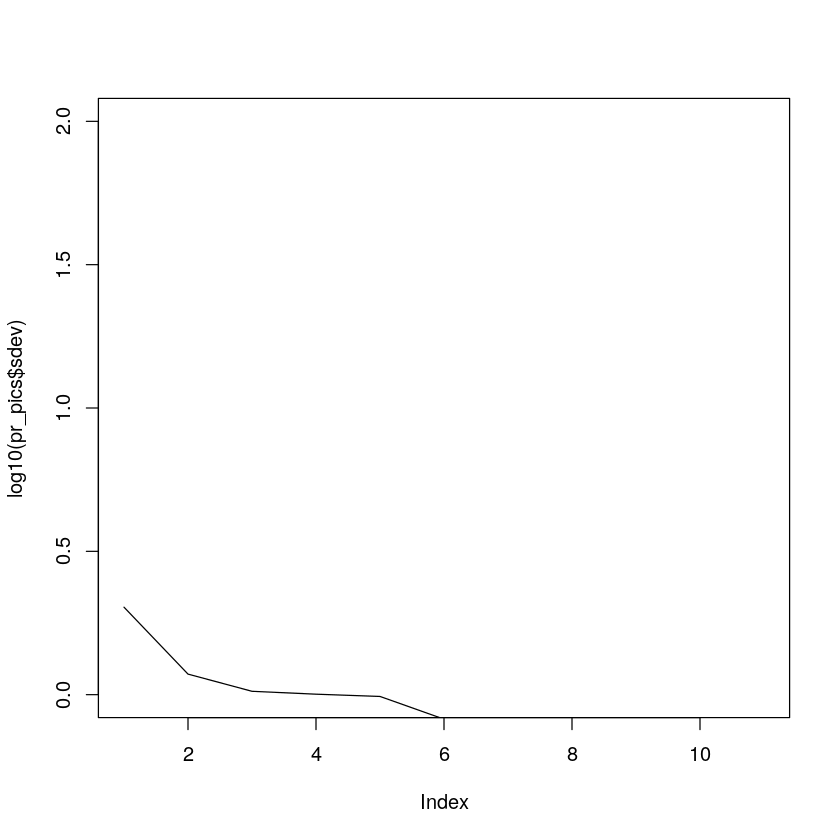

In [76]:
pr_pics<-prcomp(train_matrix,center = TRUE, scale. = TRUE)
plot(log10(pr_pics$sdev),t='l',ylim = c(0,2))

In [77]:
number_of_pca_components<-6

id_test_pic<-80

orig_pic<-train_matrix[id_test_pic,]


t_pic<-transform_pca(row=orig_pic)
t_pic<-matrix(t_pic[1:number_of_pca_components],nrow=1)

ERROR: Error in v - pca_result$center: non-numeric argument to binary operator


In [78]:
Apc<-pr_pics$x[,1:number_of_pca_components]
dist<-rep(NA,nrow(Apc))
for (i in 1:nrow(Apc)){
    dist[i]<-sum((t_pic-Apc[i,])^2)
}
#dist<-rowSums((t_pic[rep(1, times = nrow(t_pic$x)), ]-pr_pics$x)^2)

ERROR: Error in eval(expr, envir, enclos): object 't_pic' not found


In [79]:
order(dist)[1:5]

[1] 1 2 3 4 5

Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?